In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [11]:
df_nulos = pd.read_csv("world-data-2023_part1_pair.csv", index_col = 0)
df_nulos.head(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lat,long
0,Afghanistan,60,AF,58.1,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.3,AFN,4.47,2.1,0.7,"19,101,353,833",104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,"38,041,754",48.9,9.3,71.4,11.12,"9,797,273",33.93911,67.709953


1. Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

In [12]:
df_nulos.isnull().sum()

country                               0
density                               0
abbreviation                          7
agriculturalland                      7
landarea                              1
armedforcessize                      24
birthrate                             6
callingcode                           1
capital/majorcity                     3
co2-emissions                         7
cpi                                  17
cpichange                            16
currency-code                        15
fertilityrate                         7
forestedarea                          7
gasolineprice                        20
gdp                                   2
grossprimaryeducationenrollment       7
grosstertiaryeducationenrollment     12
infantmortality                       6
largestcity                           6
lifeexpectancy                        8
maternalmortalityratio               14
minimumwage                          45
officiallanguage                      5


In [13]:
df_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            195 non-null    object 
 1   density                            195 non-null    object 
 2   abbreviation                       188 non-null    object 
 3   agriculturalland                   188 non-null    float64
 4   landarea                           194 non-null    object 
 5   armedforcessize                    171 non-null    object 
 6   birthrate                          189 non-null    float64
 7   callingcode                        194 non-null    float64
 8   capital/majorcity                  192 non-null    object 
 9   co2-emissions                      188 non-null    object 
 10  cpi                                178 non-null    object 
 11  cpichange                          179 non-null    float64

In [14]:
df_nulos_1 = pd.DataFrame((df_nulos.isnull().sum() / df_nulos.shape[0]) * 100, columns = ["%_nulos"])

df_nulos_1[df_nulos_1["%_nulos"] > 0]

,%_nulos
abbreviation,3.589744
agriculturalland,3.589744
landarea,0.512821
armedforcessize,12.307692
birthrate,3.076923
callingcode,0.512821
capital/majorcity,1.538462
co2-emissions,3.589744
cpi,8.717949
cpichange,8.205128


2. Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

In [16]:
#categoricas

nulos_categoricos = df_nulos[df_nulos.columns[df_nulos.isnull().any()]].select_dtypes(include = "object")
nulos_categoricos.columns

Index(['abbreviation', 'landarea', 'armedforcessize', 'capital/majorcity',
       'co2-emissions', 'cpi', 'currency-code', 'gdp', 'largestcity',
       'officiallanguage', 'population', 'urban_population'],
      dtype='object')

In [17]:
#numericos

nulos_numeros = df_nulos[df_nulos.columns[df_nulos.isnull().any()]].select_dtypes(include = "float64")
nulos_categoricos.columns

Index(['abbreviation', 'landarea', 'armedforcessize', 'capital/majorcity',
       'co2-emissions', 'cpi', 'currency-code', 'gdp', 'largestcity',
       'officiallanguage', 'population', 'urban_population'],
      dtype='object')

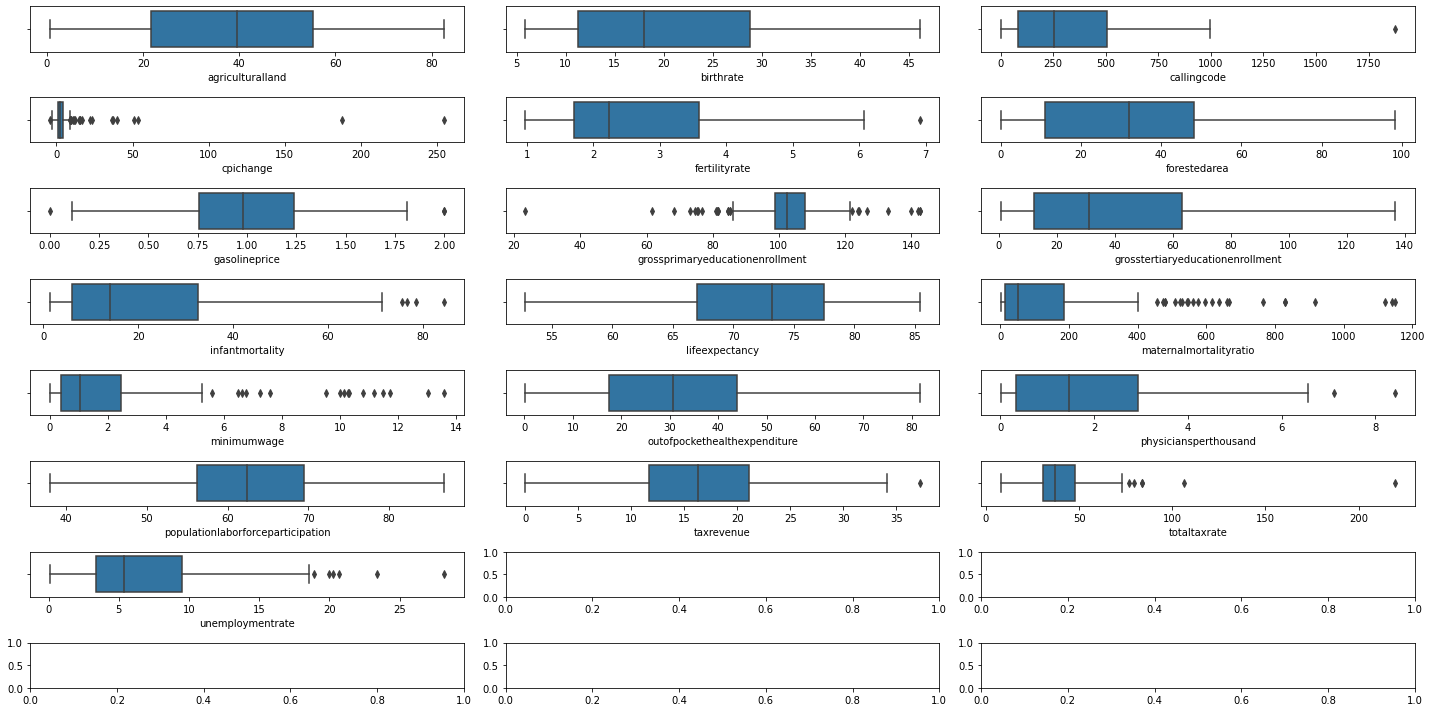

In [22]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 10))

axes = axes.flat

for indice, col in enumerate(nulos_numeros):
    sns.boxplot(x = col, data = df_nulos, ax = axes[indice])

plt.tight_layout()

plt.show();

In [23]:
nulos_numeros.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
agriculturalland,188.0,39.117553,21.783052,0.60,39.600,82.60
birthrate,189.0,20.214974,9.945774,5.90,17.950,46.08
callingcode,194.0,360.546392,323.236419,1.00,255.500,1876.00
cpichange,179.0,6.722346,24.450414,-4.30,2.300,254.90
fertilityrate,188.0,2.698138,1.282267,0.98,2.245,6.91
forestedarea,188.0,32.015426,23.791331,0.00,32.000,98.30
gasolineprice,175.0,1.002457,0.368858,0.00,0.980,2.00
grossprimaryeducationenrollment,188.0,102.470213,13.151607,23.40,102.550,142.50
grosstertiaryeducationenrollment,183.0,37.963388,29.261022,0.80,31.200,136.60
infantmortality,189.0,21.332804,19.548058,1.40,14.000,84.50


3. Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

In [20]:
#categoricos

for col in nulos_categoricos:
    df_nulos[col] = df_nulos[col].fillna("unknown")

4. Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.